# Projekt - Machine Learing in Manufacturing

#### Dozent: Felix Müller

#### Programmierer: Simon Koeller, Johannes Lehner, Hans-Joachim Redeker

## Projektthema: Verschleißvorhersage von Kugellager mit Hilfe von KI-Algorithmen auf Basis von mehreren Datensätzen

#### Bei den Datensätzen handelt es sich um Daten, die mit Hilfe von Beschleunigung-Sensoren erfasst werden, welche horizontal und vertikal an den untersuchten Kugellagern angebracht sind. 

#### Die Daten werden mit einer Abtrastfrequenz von 25,6 kHz erfasst.





##### Der Lösungsansatz ist modular aufgebaut und beinhaltet Modul 1 Data Preperation, Modul 2 Models und Modul 3 Visualization

## Modul 2: Models

# LSTM for predicting Remain Useful Lifetime

##### https://github.com/archd3sai/Predictive-Maintenance-of-Aircraft-Engine/blob/master/RUL%20Prediction%20Regression/LSTM%20RUL%20Prediction.ipynb


### 1. Schritt: Import der Libraries 

In [1]:
# import libraries for the final data preprocessing
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import os

#import libraries for the model
import keras
import keras.backend as k
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation, Masking, Dropout
from keras.optimizers import RMSprop,adam
from keras.callbacks import History
from keras import callbacks

#import libraries for the data visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

### 2. Schritt: Import der aus Modul 1 DataPeperation exportierten Datensätze


In [ ]:
# Import of the train and test data

INPUT_BASE_PATH = r"C:\Users\Johannes\Desktop\Masterstudium\MLinMF\Bearings_pkl"

#Learning Set
PICKLE_BEARING1_1_PATH = os.path.join(INPUT_BASE_PATH, "extracted_Bearing1_1_Index_100_mini.pkl")
PICKLE_BEARING1_2_PATH = os.path.join(INPUT_BASE_PATH, "extracted_Bearing1_2_Index_100_mini.pkl")
PICKLE_BEARING2_1_PATH = os.path.join(INPUT_BASE_PATH, "extracted_bearing2_1_Index_100_mini.pkl")
PICKLE_BEARING2_2_PATH = os.path.join(INPUT_BASE_PATH, "extracted_Bearing2_2_Index_100_mini.pkl")
PICKLE_BEARING3_1_PATH = os.path.join(INPUT_BASE_PATH, "extracted_bearing3_1_Index_100_mini.pkl")
PICKLE_BEARING3_2_PATH = os.path.join(INPUT_BASE_PATH, "extracted_bearing3_2_Index_100_mini.pkl")

#Test Set
PICKLE_BEARING1_3_PATH = os.path.join(INPUT_BASE_PATH, "extracted_Bearing1_3_Index_100_mini.pkl")
PICKLE_BEARING1_4_PATH = os.path.join(INPUT_BASE_PATH, "extracted_Bearing1_4_Index_100_mini.pkl")
PICKLE_BEARING1_5_PATH = os.path.join(INPUT_BASE_PATH, "extracted_Bearing1_5_Index_100_mini.pkl")
PICKLE_BEARING1_6_PATH = os.path.join(INPUT_BASE_PATH, "extracted_Bearing1_6_Index_100_mini.pkl")
#PICKLE_BEARING1_7_PATH = os.path.join(INPUT_BASE_PATH, "extracted_Bearing1_7_Index_100_mini.pkl")
PICKLE_BEARING2_3_PATH = os.path.join(INPUT_BASE_PATH, "extracted_Bearing2_3_Index_100_mini.pkl")
#PICKLE_BEARING2_4_PATH = os.path.join(INPUT_BASE_PATH, "extracted_Bearing2_4_Index_100_mini.pkl")
PICKLE_BEARING2_5_PATH = os.path.join(INPUT_BASE_PATH, "extracted_Bearing2_5_Index_100_mini.pkl")
PICKLE_BEARING2_6_PATH = os.path.join(INPUT_BASE_PATH, "extracted_Bearing2_6_Index_100_mini.pkl")
PICKLE_BEARING2_7_PATH = os.path.join(INPUT_BASE_PATH, "extracted_Bearing2_7_Index_100_mini.pkl")
PICKLE_BEARING3_3_PATH = os.path.join(INPUT_BASE_PATH, "extracted_bearing3_3_Index_100_mini.pkl")



In [2]:
#Train Datasets
Bearing_1_1 = pd.read_pickle(PICKLE_BEARING1_1_PATH)
Bearing_1_2 = pd.read_pickle(PICKLE_BEARING1_2_PATH)
Bearing_2_1 = pd.read_pickle(PICKLE_BEARING2_1_PATH)
Bearing_2_2 = pd.read_pickle(PICKLE_BEARING2_2_PATH)
Bearing_3_1 = pd.read_pickle(PICKLE_BEARING3_1_PATH)
#Bearing_3_2 = pd.read_pickle(PICKLE_BEARING3_2_PATH)

#Test Datasets
Bearing_1_3 = pd.read_pickle(PICKLE_BEARING1_3_PATH)
Bearing_1_4 = pd.read_pickle(PICKLE_BEARING1_4_PATH)
Bearing_1_5 = pd.read_pickle(PICKLE_BEARING1_5_PATH)
Bearing_1_6 = pd.read_pickle(PICKLE_BEARING1_6_PATH)
#Bearing_1_7 = pd.read_pickle(PICKLE_BEARING1_7_PATH)
Bearing_2_3 = pd.read_pickle(PICKLE_BEARING2_3_PATH)
#Bearing_2_4 = pd.read_pickle(PICKLE_BEARING2_4_PATH)
Bearing_2_5 = pd.read_pickle(PICKLE_BEARING2_5_PATH)
Bearing_2_6 = pd.read_pickle(PICKLE_BEARING2_6_PATH)
Bearing_2_7 = pd.read_pickle(PICKLE_BEARING2_7_PATH)
Bearing_3_3 = pd.read_pickle(PICKLE_BEARING3_3_PATH)


### 3. Schritt: Definition und Vorverarbeitung der Train- und Testdaten

In [ ]:
# sequence_length is the number of time steps that the LSTM-Layer will look back # and is the 3rd dimension of the x_train and x_test data
sequence_length = 50 

In [3]:
# removes all RUL feautures from the dataset except 'RUL__mean', because they would influence the prediction incorrectly
# RUL__mean is the RUL of the compromised bearing RUL__mean = RUL of 100 compromised bearings to have less datasets

remove_columns_with_rul = lambda df: df.drop(columns=[col for col in df.columns if 'RUL' in col and col != 'RUL__mean'])

Bearing_1_1 = remove_columns_with_rul(Bearing_1_1)
Bearing_1_2 = remove_columns_with_rul(Bearing_1_2)
Bearing_1_3 = remove_columns_with_rul(Bearing_1_3)
Bearing_3_1 = remove_columns_with_rul(Bearing_3_1)
Bearing_2_2 = remove_columns_with_rul(Bearing_2_2)
Bearing_2_1 = remove_columns_with_rul(Bearing_2_1)
Bearing_1_6 = remove_columns_with_rul(Bearing_1_6)
Bearing_1_5 = remove_columns_with_rul(Bearing_1_5)
Bearing_1_4 = remove_columns_with_rul(Bearing_1_4)
Bearing_2_5 = remove_columns_with_rul(Bearing_2_5)
Bearing_2_3 = remove_columns_with_rul(Bearing_2_3)
Bearing_3_3 = remove_columns_with_rul(Bearing_3_3)
Bearing_2_7 = remove_columns_with_rul(Bearing_2_7)
Bearing_2_6 = remove_columns_with_rul(Bearing_2_6)

In [4]:
# create train and test data
train_data = [Bearing_1_1, Bearing_1_2,Bearing_1_6,Bearing_1_5,Bearing_1_4]
test_data = [Bearing_1_3]
# concatenate train dataframes
train_data = pd.concat([data for data in train_data], ignore_index=True)
test_data = pd.concat([data for data in test_data], ignore_index=True)


In [8]:
# split train and test data into x and y sets, where y is the 'RUL__mean' and x are all other features
y_train = train_data['RUL__mean']
x_train = train_data.drop(columns=['RUL__mean'])
y_test = test_data['RUL__mean']
x_test = test_data.drop(columns=['RUL__mean'])

# scale the data between -1 and 1 to improve the model performance
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))

x_train = min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.fit_transform(x_test)

y_train = min_max_scaler.fit_transform(y_train.values.reshape(-1,1))
y_test = min_max_scaler.fit_transform(y_test.values.reshape(-1,1))	

In [10]:
#LSTM needs 3d array as an input 
# this function creates a 3D array out of a 2D array with a given sequence length of x_train and x_test
def generate_3d_array(df, sequence_length):
    num_rows = df.shape[0]
    num_cols = df.shape[1]
    num_sequences = num_rows - sequence_length + 1

    # Initialize the 3D array
    lstm_array_3d = np.zeros((num_sequences, sequence_length, num_cols))

    for i in range(num_sequences):
        sequence = df.iloc[i:i+sequence_length, :].values
        lstm_array_3d[i, :, :] = sequence

    return lstm_array_3d

In [13]:
# convert numpy arrays to pandas dataframes
x_train = pd.DataFrame(x_train)
# create 3D array for LSTM out of x_train and safe it as x_train_lstm
x_train_lstm=generate_3d_array(x_train, sequence_length)
x_train_lstm.shape

(241029, 50, 39)

In [15]:
# create 3D array for LSTM out of y_train safe it as y_train_lstm
y_train_lstm = np.expand_dims(y_train, axis=-1)


In [16]:
# dummy who gives the number of rows that have to be cut from y_train_lstm to fit the shape of x_train_lstm
cut_dummy_train = y_train_lstm.shape[0] - x_train_lstm.shape[0]
# cut the last rows of y_train_lstm to fit the shape of x_train_lstm
y_train_lstm = y_train_lstm[cut_dummy_train:,:]
y_train_lstm.shape

(241029, 1, 1)

In [17]:
# convert numpy arrays to pandas dataframes
x_test = pd.DataFrame(x_test)
# create 3D array for LSTM out of x_test and safe it as x_test_lstm
x_test_lstm=generate_3d_array(x_test, sequence_length)

x_test_lstm.shape

(46083, 50, 39)

In [18]:
# create 3D array for LSTM out of y_test and safe it as y_test_lstm
y_test_lstm = np.expand_dims(y_test, axis=-1)

y_test_lstm.shape

(46132, 1, 1)

In [19]:
# dummy who gives the number of rows that have to be cut from y_test_lstm to fit the shape of x_test_lstm
cut_dummy_test = y_test_lstm.shape[0] - x_test_lstm.shape[0]
#cut the last rows of y_test_lstm to fit y_test the shape of x_test_lstm
y_test_lstm = y_test_lstm[cut_dummy_test:,:]
y_test_lstm.shape
y_test = y_test[cut_dummy_test:,:]

### 4. Schritt: Anwendung des LSTM Model

In [20]:
# gives the number of features of the x_train_lstm and x_test_lstm
count_features = x_train_lstm.shape[2]


In [21]:
# create the LSTM model

# define hsitory to save the loss and mse of the model while training
history = History()

# define model as a sequential model
model = Sequential()

# LSTM-Layer with 128 units and a dropout of 0.2 
# input_shape is the shape of the x_train_lstm and sequence_length ist variable of look back steps
model.add(LSTM(
         units=128,
         return_sequences=True,
         input_shape=(sequence_length, count_features)))
model.add(Dropout(0.2))

# LSTM-Layer with 128 units and a dropout of 0.2 
model.add(LSTM(
          units=128,
          return_sequences=False))

# Dense-Layer with 1 unit and a linear activation function to predict the RUL
model.add(Dense(units=1, activation='linear'))
model.add(Dropout(0.2))
model.add(Activation("linear"))

# Dense-Layer with 128 units and a tanh activation function for feature extraction
model.add(Dense(units=128, activation='tanh'))
model.add(Dropout(0.2))
model.add(Activation("tanh"))

# compile the modell with the given parameters
model.compile(loss="mse", optimizer="rmsprop", metrics=['mse'],)

# get a summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 128)           86016     
                                                                 
 dropout (Dropout)           (None, 50, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
 dropout_1 (Dropout)         (None, 1)                 0         
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
 dense_1 (Dense)             (None, 128)               2

In [22]:
#gives the time the model needs to train pro epoch
%%time
# fit the model
# train the model with the data x_train_lstm and y_train_lstm for 7 epochs and a batch size of 32 and a validation split of 0.1
# dass Training wird vorzeitig beendet, wenn der val_loss nicht mehr verbessert wird.
model.fit(x_train_lstm, y_train_lstm, epochs=7, batch_size=32, validation_split=0.1, verbose=1,
          callbacks = [history, keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto')])

Epoch 1/7
6779/6779 [==============================] - 396s 58ms/step - loss: 0.1684 - mse: 0.1684 - val_loss: 0.1756 - val_mse: 0.1756
Epoch 2/7
6779/6779 [==============================] - 384s 57ms/step - loss: 0.1488 - mse: 0.1488 - val_loss: 0.1229 - val_mse: 0.1229
Epoch 3/7
6779/6779 [==============================] - 395s 58ms/step - loss: 0.1468 - mse: 0.1468 - val_loss: 0.3849 - val_mse: 0.3849
Epoch 4/7
6779/6779 [==============================] - 400s 59ms/step - loss: 0.1492 - mse: 0.1492 - val_loss: 0.2174 - val_mse: 0.2174
Epoch 5/7
6779/6779 [==============================] - 402s 59ms/step - loss: 0.1380 - mse: 0.1380 - val_loss: 0.0639 - val_mse: 0.0639
Epoch 6/7
6779/6779 [==============================] - 402s 59ms/step - loss: 0.1340 - mse: 0.1340 - val_loss: 0.2648 - val_mse: 0.2648
Epoch 7/7
6779/6779 [==============================] - 399s 59ms/step - loss: 0.1237 - mse: 0.1237 - val_loss: 0.1328 - val_mse: 0.1328
CPU times: total: 6h 4min 35s
Wall time: 46min 1

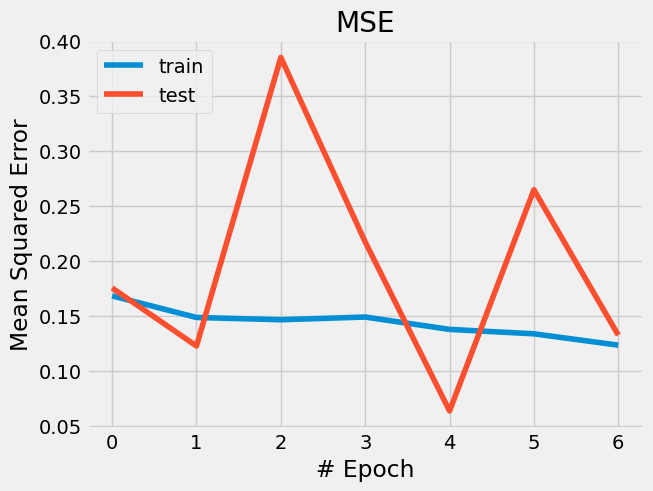

In [24]:
# plot a graph of loss mse and val_mse of the model
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('MSE')
plt.ylabel('Mean Squared Error')
plt.xlabel('# Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Evaluation of the LSTM Model

In [27]:
# test the training model with the test data x_test_lstm and y_test_lstm
scores_test = model.evaluate(x_test_lstm, y_test_lstm, verbose=2)
# print the mse of the test data
print('MSE: {}'.format(scores_test[1]))

1441/1441 - 25s - loss: 0.0520 - mse: 0.0520 - 25s/epoch - 17ms/step
MSE: 0.052028387784957886


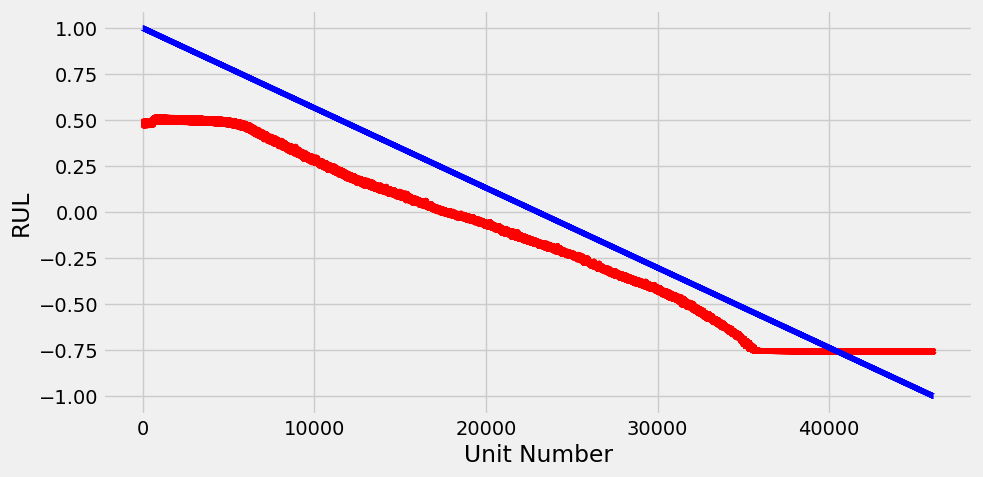

In [28]:
# predict the RUL of the test data
y_pred_test = model.predict(x_test_lstm, verbose=0)
#plot the predicted RUL and the ground truth RUL to compare them
plt.figure(figsize=(10,5))
plt.plot(y_pred_test, color='red', label='Prediction')
plt.plot(y_test, color='blue', label='Ground Truth')
plt.ylabel("RUL")
plt.xlabel("Unit Number")

plt.show()

In [29]:
# scale the predicted RUL and the ground truth RUL back to the original scale
y_test_original = min_max_scaler.inverse_transform(y_test)
y_pred_test_original = min_max_scaler.inverse_transform(y_pred_test)

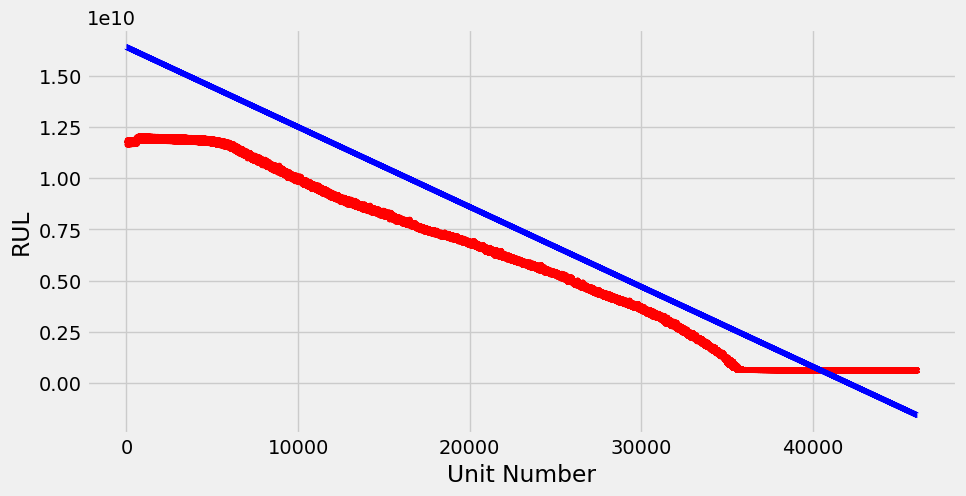

In [30]:
#plot the predicted RUL and the ground truth RUL to compare them with original scale
plt.figure(figsize=(10,5))
plt.plot(y_pred_test_original, color='red', label='Prediction')
plt.plot(y_test_original, color='blue', label='Ground Truth')
plt.ylabel("RUL")
plt.xlabel("Unit Number")

plt.show()

In [31]:
# calculate and print the RMSE of the predicted RUL and the ground truth RUL
squared_diff = np.square(y_pred_test - y_test)

mean_squared_diff = np.mean(squared_diff)

rmse = np.sqrt(mean_squared_diff)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.2280974570535989


In [32]:
# calculate and print the MAE of the predicted RUL and the ground truth RUL
absolute_diff = np.abs(y_pred_test - y_test)

mae = np.mean(absolute_diff)

print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.20542498657013628


In [33]:
# calculate and print the MAPE of the predicted RUL and the ground truth RUL
absolute_percentage_diff = np.abs((y_pred_test - y_test) / y_test) * 100

mape = np.mean(absolute_percentage_diff)

print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 157.63036096192585


In [34]:
# save the model
model.save('LSTM_RUL_prediction_vers5.h5')

In [35]:
# safe the predictions in a txt file
with open("results.txt", "w") as file:
 
    # Write the predictions to the file
    file.write("\nPredictions:\n")
    for i, prediction in enumerate(y_pred_test_original):
        file.write("Sample {}: {}\n".format(i+1,y_pred_test_original))

In [37]:

#safe y_pred_test_original as dataframe
y_pred_test_original_df = pd.DataFrame(y_pred_test_original)
y_pred_test_original_df.to_csv('y_pred_test_original_vers5.csv')

In [39]:
# print the first rows of y_pred_test_original
y_pred_test_original_df.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,1.177364e+10,1.172242e+10,1.181353e+10,1.171184e+10,1.171025e+10,1.169806e+10,1.170895e+10,1.169313e+10,1.175277e+10,1.167977e+10,...,1.170892e+10,1.175252e+10,1.182865e+10,1.170521e+10,1.171159e+10,1.173665e+10,1.171675e+10,1.173265e+10,1.171782e+10,1.180272e+10
1,1.177437e+10,1.172315e+10,1.181426e+10,1.171257e+10,1.171098e+10,1.169880e+10,1.170969e+10,1.169387e+10,1.175351e+10,1.168051e+10,...,1.170966e+10,1.175326e+10,1.182938e+10,1.170595e+10,1.171233e+10,1.173739e+10,1.171748e+10,1.173339e+10,1.171856e+10,1.180345e+10
2,1.177646e+10,1.172523e+10,1.181634e+10,1.171466e+10,1.171306e+10,1.170090e+10,1.171179e+10,1.169597e+10,1.175560e+10,1.168260e+10,...,1.171176e+10,1.175536e+10,1.183146e+10,1.170806e+10,1.171444e+10,1.173948e+10,1.171956e+10,1.173548e+10,1.172065e+10,1.180554e+10
3,1.178157e+10,1.173035e+10,1.182143e+10,1.171979e+10,1.171818e+10,1.170604e+10,1.171695e+10,1.170112e+10,1.176075e+10,1.168773e+10,...,1.171692e+10,1.176050e+10,1.183655e+10,1.171324e+10,1.171960e+10,1.174461e+10,1.172466e+10,1.174063e+10,1.172580e+10,1.181066e+10
4,1.178195e+10,1.173073e+10,1.182181e+10,1.172017e+10,1.171855e+10,1.170642e+10,1.171732e+10,1.170150e+10,1.176113e+10,1.168811e+10,...,1.171730e+10,1.176087e+10,1.183692e+10,1.171362e+10,1.171998e+10,1.174498e+10,1.172503e+10,1.174101e+10,1.172617e+10,1.181103e+10
